In [2]:
from numpy.linalg import inv, solve
from numpy import zeros, dot, array, append
import numpy as np

In [3]:
def set_matrix(nodes=5, geometry="cartesian", D=9.0, w=10.0, sigma=0.15):
    deltaX = w / (nodes - 1.0)
    n = nodes - 1
    
    matrix = zeros((n,n))
    if geometry == "cartesian":
        matrix[0][0] = D / deltaX ** 2.0 + 0.5 * sigma
        matrix[0][1] = -1.0 * D / deltaX ** 2.0
        for i in range(1, n-1):
            matrix[i][i] = 2 * D / deltaX ** 2 + sigma
            matrix[i][i-1] = -1.0 * D / deltaX ** 2
            matrix[i][i+1] = -1.0 * D / deltaX ** 2
        matrix[n-1][n-1] = 2 * D / deltaX ** 2.0 + sigma
        matrix[n-1][n-2] = -1.0 * D / deltaX ** 2.0

    return matrix

In [4]:
def flux(nodes=5, geometry="cartesian", D=9.0, w=10.0, sigma=0.15):
    n = nodes - 1
    A = set_matrix(nodes=nodes, geometry=geometry, D=D, w=w, sigma=sigma)
    S_vector = zeros(n)
    S = 10.0 ** 8
    S_vector[0] = S / (2.0 * w / n)
    
    return append(dot(inv(A), S_vector), 0.0)

In [5]:
%matplotlib inline

In [22]:
import matplotlib.pyplot as plt
fig_size = []
fig_size.append(15)
fig_size.append(10)
plt.rcParams["figure.figsize"] = fig_size

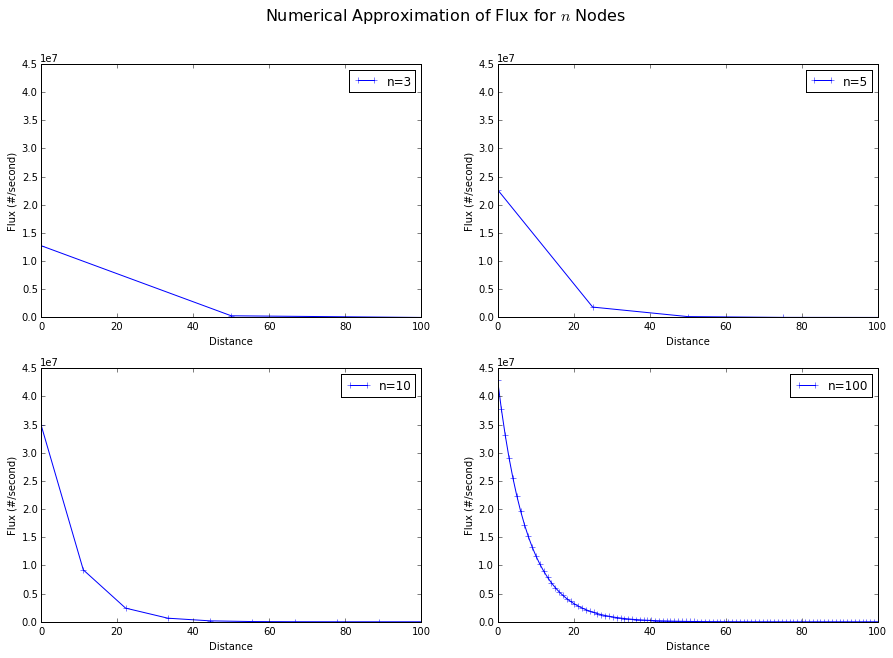

In [36]:
W = 100
def x(n):
    return np.linspace(0, W, n)

fig = plt.figure(1)
plt.suptitle("Numerical Approximation of Flux for $n$ Nodes", size=16)

a = plt.subplot(221)
plt.plot(x(3), flux(nodes=3, w=W), 'b-+', label="n=3")
plt.legend(loc='upper right')
plt.xlabel('Distance')
plt.ylabel('Flux (#/second)')

b = plt.subplot(222, sharey=a)
plt.plot(x(5), flux(nodes=5, w=W), 'b-+', label="n=5")
plt.legend(loc='upper right')
plt.ylabel('Flux (#/second)')
plt.xlabel('Distance')

c = plt.subplot(224, sharey=a)
plt.plot(x(100), flux(nodes=100, w=W), 'b-+', label="n=100")
plt.legend(loc='upper right')
plt.ylabel('Flux (#/second)')
plt.xlabel('Distance')

d = plt.subplot(223, sharey=a)
plt.plot(x(10), flux(nodes=10, w=W), 'b-+', label="n=10")
plt.legend(loc='upper right')
plt.ylabel('Flux (#/second)')
plt.xlabel('Distance')

plt.show()

## Analytical Solution for Cartesian Coordinates ##

In [37]:
def phi_analytic(x, S, w, sigma):
    D = 1.0 / (3.0 * sigma)
    L = (D / sigma) ** 0.5
    
    constant = S * L / (2.0 * D)
    numerator = np.exp(-x / L) - np.exp((x - 2.0 * w) / L)
    denominator = 1.0 - np.exp(-2.0 * w / L)
    
    return constant * numerator / denominator

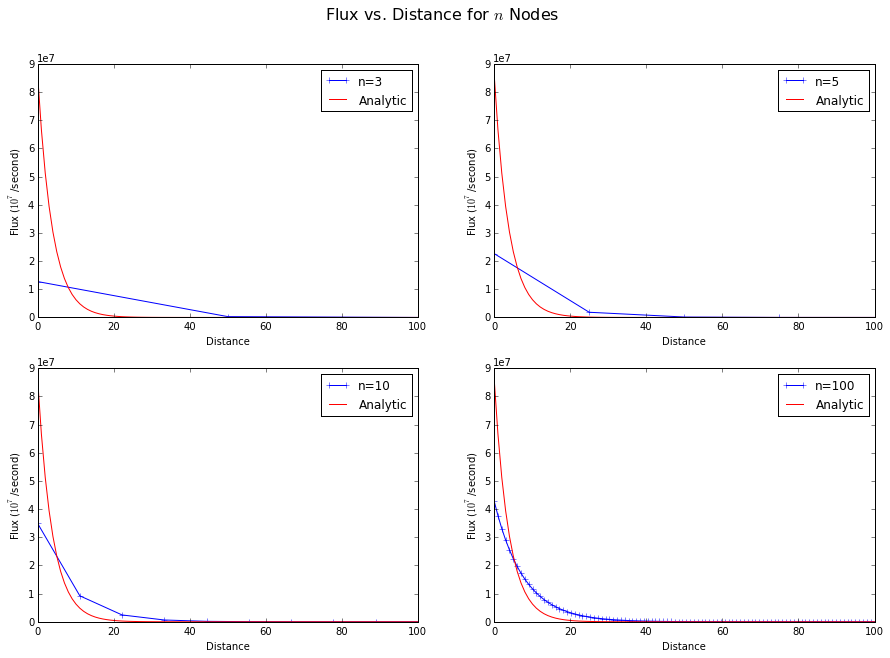

In [43]:
W = 100
def x(n):
    return np.linspace(0, W, n)

fig = plt.figure(1)
plt.suptitle("Flux vs. Distance for $n$ Nodes", size=16)

a = plt.subplot(221)
plt.plot(x(3), flux(nodes=3, w=W), 'b-+', label="n=3")
plt.plot(x(100), phi_analytic(x(100), S=10**8.0, w=W, sigma=0.15), 'r-', label="Analytic")
plt.legend(loc='upper right')
plt.xlabel('Distance')
plt.ylabel('Flux ($10^7$/second)')

b = plt.subplot(222, sharey=a)
plt.plot(x(5), flux(nodes=5, w=W), 'b-+', label="n=5")
plt.plot(x(100), phi_analytic(x(100), S=10**8.0, w=W, sigma=0.15), 'r-', label="Analytic")
plt.legend(loc='upper right')
plt.ylabel('Flux ($10^7$/second)')
plt.xlabel('Distance')

c = plt.subplot(224, sharey=a)
plt.plot(x(100), flux(nodes=100, w=W), 'b-+', label="n=100")
plt.plot(x(100), phi_analytic(x(100), S=10**8.0, w=W, sigma=0.15), 'r-', label="Analytic")
plt.legend(loc='upper right')
plt.ylabel('Flux ($10^7$/second)')
plt.xlabel('Distance')

d = plt.subplot(223, sharey=a)
plt.plot(x(10), flux(nodes=10, w=W), 'b-+', label="n=10")
plt.plot(x(100), phi_analytic(x(100), S=10**8.0, w=W, sigma=0.15), 'r-', label="Analytic")
plt.legend(loc='upper right')
plt.ylabel('Flux ($10^7$/second)')
plt.xlabel('Distance')

plt.show()